Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Jordan Vercillo"
COLLABORATORS = "Jordan Vercillo"

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

**Question_1/2**

Set up code for both options, I orginally downloaded stock prices using QUANDL but it looked like the libray only contained data up till 2018. I kept the code here for reference.

In [2]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web
import os

os.environ['QUANDL_API_KEY'] = ""



In [3]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

start = datetime.datetime(2013, 11, 12)
end = datetime.datetime.now()

amzn_ql = web.DataReader('WIKI/AMZN', 'quandl', start, end)
fb_ql = web.DataReader('WIKI/FB', 'quandl', start, end)
ibm_ql = web.DataReader('WIKI/IBM', 'quandl', start, end)
mmm_ql = web.DataReader('WIKI/MMM', 'quandl', start, end)

In [4]:
fb_ql

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,156.31,162.85,150.75,152.190,76787884.0,0.0,1.0,156.31,162.85,150.75,152.190,76787884.0
2018-03-26,160.82,161.10,149.02,160.060,125438294.0,0.0,1.0,160.82,161.10,149.02,160.060,125438294.0
2018-03-23,165.44,167.10,159.02,159.390,52306891.0,0.0,1.0,165.44,167.10,159.02,159.390,52306891.0
2018-03-22,166.13,170.27,163.72,164.890,73389988.0,0.0,1.0,166.13,170.27,163.72,164.890,73389988.0
2018-03-21,164.80,173.40,163.30,169.390,105350867.0,0.0,1.0,164.80,173.40,163.30,169.390,105350867.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-18,48.47,48.84,45.80,45.830,85910000.0,0.0,1.0,48.47,48.84,45.80,45.830,85910000.0
2013-11-15,49.11,49.48,48.71,49.010,42453000.0,0.0,1.0,49.11,49.48,48.71,49.010,42453000.0
2013-11-14,48.70,49.57,48.03,48.990,75117000.0,0.0,1.0,48.70,49.57,48.03,48.990,75117000.0


In [5]:
fb_ql

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,156.31,162.85,150.75,152.190,76787884.0,0.0,1.0,156.31,162.85,150.75,152.190,76787884.0
2018-03-26,160.82,161.10,149.02,160.060,125438294.0,0.0,1.0,160.82,161.10,149.02,160.060,125438294.0
2018-03-23,165.44,167.10,159.02,159.390,52306891.0,0.0,1.0,165.44,167.10,159.02,159.390,52306891.0
2018-03-22,166.13,170.27,163.72,164.890,73389988.0,0.0,1.0,166.13,170.27,163.72,164.890,73389988.0
2018-03-21,164.80,173.40,163.30,169.390,105350867.0,0.0,1.0,164.80,173.40,163.30,169.390,105350867.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-18,48.47,48.84,45.80,45.830,85910000.0,0.0,1.0,48.47,48.84,45.80,45.830,85910000.0
2013-11-15,49.11,49.48,48.71,49.010,42453000.0,0.0,1.0,49.11,49.48,48.71,49.010,42453000.0
2013-11-14,48.70,49.57,48.03,48.990,75117000.0,0.0,1.0,48.70,49.57,48.03,48.990,75117000.0


In [6]:
ibm_ql

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,153.95,154.8697,151.160,151.91,3810994.0,0.0,1.0,153.950000,154.869700,151.160000,151.910000,3810994.0
2018-03-26,151.21,153.6570,150.280,153.37,4038586.0,0.0,1.0,151.210000,153.657000,150.280000,153.370000,4038586.0
2018-03-23,152.25,152.5800,148.541,148.89,4389015.0,0.0,1.0,152.250000,152.580000,148.541000,148.890000,4389015.0
2018-03-22,155.00,155.2499,152.000,152.09,4617371.0,0.0,1.0,155.000000,155.249900,152.000000,152.090000,4617371.0
2018-03-21,156.57,158.2000,155.920,156.69,3240695.0,0.0,1.0,156.570000,158.200000,155.920000,156.690000,3240695.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-18,183.52,184.9900,183.270,184.47,5344900.0,0.0,1.0,160.908548,162.197429,160.689350,161.741499,5344900.0
2013-11-15,182.38,183.2800,181.160,183.19,5176100.0,0.0,1.0,159.909007,160.698118,158.839323,160.619207,5176100.0
2013-11-14,180.48,183.2000,179.660,182.21,6321500.0,0.0,1.0,158.243105,160.627975,157.524137,159.759953,6321500.0


In [7]:
mmm_ql

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-07,231.22,236.22,230.590,235.57,2213792.0,0.0,1.0,231.220000,236.220000,230.590000,235.570000,2213792.0
2018-03-06,234.05,235.92,230.800,233.66,2089047.0,0.0,1.0,234.050000,235.920000,230.800000,233.660000,2089047.0
2018-03-05,230.00,233.71,228.530,232.81,2235348.0,0.0,1.0,230.000000,233.710000,228.530000,232.810000,2235348.0
2018-03-02,229.75,231.27,226.330,230.37,2912828.0,0.0,1.0,229.750000,231.270000,226.330000,230.370000,2912828.0
2018-03-01,236.15,236.83,229.530,231.34,3487126.0,0.0,1.0,236.150000,236.830000,229.530000,231.340000,3487126.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-11-18,129.91,130.50,129.775,130.13,2148200.0,0.0,1.0,117.607560,118.141688,117.485345,117.806727,2148200.0
2013-11-15,129.15,130.00,128.980,129.85,2360400.0,0.0,1.0,116.919532,117.689037,116.765631,117.553242,2360400.0
2013-11-14,128.97,130.12,128.800,129.79,2569800.0,0.0,1.0,116.756578,117.797673,116.602677,117.498924,2569800.0


**Question1/2**

Set up code and downloading of stock prices for AMZN, FB, IBM, and MMM from Yahoo Finance

In [8]:
#importing data science fundamental programs
import pandas as pd # For computations
import numpy as np # For indexing our data
# Our temporal data types
from datetime import datetime
from datetime import timedelta
#Used for importing and reading stock data
import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

start = datetime(2019, 4, 27)
end = datetime(2024, 3, 27)


amzn = pdr.get_data_yahoo('AMZN', start = start)
fb = pdr.get_data_yahoo('META', start = start)
ibm = pdr.get_data_yahoo('IBM', start = start)
mmm = pdr.get_data_yahoo('MMM', start = start)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [9]:
#Creating an all stocks list to validate data of all 4 stocks at once
all_stocks_list = ['AMZN', 'META','IBM','MMM']
all_stocks = yf.download(all_stocks_list, start = start)

[*********************100%%**********************]  4 of 4 completed


In [10]:
all_stocks

Price        Adj Close                                           Close  \
Ticker            AMZN         IBM        META         MMM        AMZN   
Date                                                                     
2019-04-29   96.921501  104.422127  194.573547  154.065033   96.921501   
2019-04-30   96.325996  105.338303  193.195007  153.498047   96.325996   
2019-05-01   95.575996  105.556099  192.825409  150.711731   95.575996   
2019-05-02   95.041000  104.827667  192.325943  149.642563   95.041000   
2019-05-03   98.123001  105.323303  195.262817  150.023239   98.123001   
...                ...         ...         ...         ...         ...   
2024-03-22  178.869995  190.839996  509.579987  106.779999  178.869995   
2024-03-25  179.710007  188.789993  503.019989  104.839996  179.710007   
2024-03-26  178.300003  188.500000  495.890015  102.629997  178.300003   
2024-03-27  179.830002  190.800003  493.859985  104.589996  179.830002   
2024-03-28  180.380005  190.960007  485.579987  106.070000  180.380005   

Price                                                 High              ...  \
Ticker             IBM        META         MMM        AMZN         IBM  ...   
Date                                                                    ...   
2019-04-29  132.934998  194.779999  190.210007   97.817001  133.489487  ...   
2019-04-30  134.101334  193.399994  189.509995   96.785500  134.263855  ...   
2019-05-01  134.378586  193.029999  186.070007   97.181999  135.573608  ...   
2019-05-02  133.451248  192.529999  184.750000   96.077499  135.066925  ...   
2019-05-03  134.082214  195.470001  185.220001   98.220001  134.799240  ...   
...                ...         ...         ...         ...         ...  ...   
2024-03-22  190.839996  509.579987  106.779999  179.259995  192.990005  ...   
2024-03-25  188.789993  503.019989  104.839996  180.990005  190.820007  ...   
2024-03-26  188.500000  495.890015  102.629997  180.449997  190.000000  ...   
2024-03-27  190.800003  493.859985  104.589996  180.000000  190.960007  ...   
2024-03-28  190.960007  485.579987  106.070000  181.699997  191.929993  ...   

Price              Low                    Open                          \
Ticker            META         MMM        AMZN         IBM        META   
Date                                                                     
2019-04-29  190.649994  189.750000   97.449997  133.030594  190.949997   
2019-04-30  192.279999  186.550003   96.504997  132.992355  194.190002   
2019-05-01  193.009995  185.919998   96.654503  134.369019  194.779999   
2019-05-02  189.750000  183.380005   95.666496  134.321228  193.000000   
2019-05-03  193.710007  184.089996   97.449997  133.556412  194.380005   
...                ...         ...         ...         ...         ...   
2024-03-22  504.339996  106.750000  177.750000  192.000000  507.000000   
2024-03-25  500.239990  104.779999  178.009995  190.259995  505.790009   
2024-03-26  495.209991  102.400002  180.149994  189.020004  505.130005   
2024-03-27  488.070007  102.989998  179.880005  189.600006  499.299988   
2024-03-28  485.149994  104.589996  180.169998  190.940002  492.839996   

Price                      Volume                              
Ticker             MMM       AMZN      IBM      META      MMM  
Date                                                           
2019-04-29  191.520004   80426000  3094382  19641300  3803400  
2019-04-30  190.860001   70120000  4852185  23494700  4541000  
2019-05-01  189.490005   62340000  3194170  15996600  3818500  
2019-05-02  184.500000   79258000  3704304  13209500  5654900  
2019-05-03  185.809998  127632000  2698575  14575400  4747700  
...                ...        ...      ...       ...      ...  
2024-03-22  107.599998   27964100  3987700   8117000  4447900  
2024-03-25  105.900002   29815500  3718300   8380600  5585300  
2024-03-26  104.059998   29659000  4229500  11205400  6086700  
2024-03-27  103.000000   33272600  3693300   998970

In [11]:
#No NaNs we are good to go
all_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1239 entries, 2019-04-29 to 2024-03-28
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AMZN)  1239 non-null   float64
 1   (Adj Close, IBM)   1239 non-null   float64
 2   (Adj Close, META)  1239 non-null   float64
 3   (Adj Close, MMM)   1239 non-null   float64
 4   (Close, AMZN)      1239 non-null   float64
 5   (Close, IBM)       1239 non-null   float64
 6   (Close, META)      1239 non-null   float64
 7   (Close, MMM)       1239 non-null   float64
 8   (High, AMZN)       1239 non-null   float64
 9   (High, IBM)        1239 non-null   float64
 10  (High, META)       1239 non-null   float64
 11  (High, MMM)        1239 non-null   float64
 12  (Low, AMZN)        1239 non-null   float64
 13  (Low, IBM)         1239 non-null   float64
 14  (Low, META)        1239 non-null   float64
 15  (Low, MMM)         1239 non-null   float64
 16  (Open,

In [12]:
# Using the Naive method, All forecasts are simply set to be the value of the last observation of the business month. This is done using the 'BM' time series frequency instead of the 'M' time series frequency
#https://www.geeksforgeeks.org/python-pandas-dataframe-resample/

amzn_month_end = amzn['Adj Close'].resample('BM').last()
fb_month_end = fb['Adj Close'].resample('BM').last()
ibm_month_end = ibm['Adj Close'].resample('BM').last()
mmm_month_end = mmm['Adj Close'].resample('BM').last()
all_stocks_month_end = all_stocks['Adj Close'].resample('BM').last()

In [13]:
all_stocks_month_end

Ticker,AMZN,IBM,META,MMM
Date,,,,
2019-04-30,96.325996,105.338303,193.195007,153.498047
2019-05-31,88.753502,96.498276,177.281906,130.500351
2019-06-28,94.681503,104.788643,192.795441,141.602051
2019-07-31,93.338997,112.645905,194.024139,142.729370
2019-08-30,88.814499,104.201180,185.473206,133.318512
2019-09-30,86.795502,111.805038,177.891251,135.527847
2019-10-31,88.833000,102.817261,191.446869,136.014206
2019-11-29,90.040001,104.591766,201.426285,141.166412
2019-12-31,92.391998,104.272804,205.032455,146.695984


In [14]:
all_stocks_month_end.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-04-30 to 2024-03-29
Freq: BM
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    60 non-null     float64
 1   IBM     60 non-null     float64
 2   META    60 non-null     float64
 3   MMM     60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


In [15]:
all_stocks_month_end.describe()

Ticker,AMZN,IBM,META,MMM
count,60.000000,60.000000,60.000000,60.000000
mean,132.033657,119.345200,251.650583,129.816152
std,30.596246,22.021977,84.010040,24.412706
min,84.000000,87.196106,93.061264,88.077980
25%,101.939001,103.916012,192.663082,107.337017
50%,133.384995,118.075089,246.733215,132.371498
75%,158.878994,127.376612,314.261566,148.044094
max,180.380005,190.960007,490.130005,177.859741


In [16]:
#Importing for autocorrelation plot
import matplotlib.pyplot as plt

**AMZN_Auto_Correlation**

This graph shows positive autocorrelation that becomes statisically insignificant around 6/7 months lag (shown by the dashed lines). This suggests that while there is positive autocorrelation in the short term, it becomes much less predictable over a longer period of time.  

The autocorrelation fluctuates around zero, occasionally dipping into negative territory between lags 12 and 24. This doesn't necessarily indicate an inverse relationship but rather a lack of consistent correlation, making predictions based on past returns unreliable in this period.

Overall this indicates that it is difficult to predicit the pattern due to the cyclical variation of the autocorrelation. 

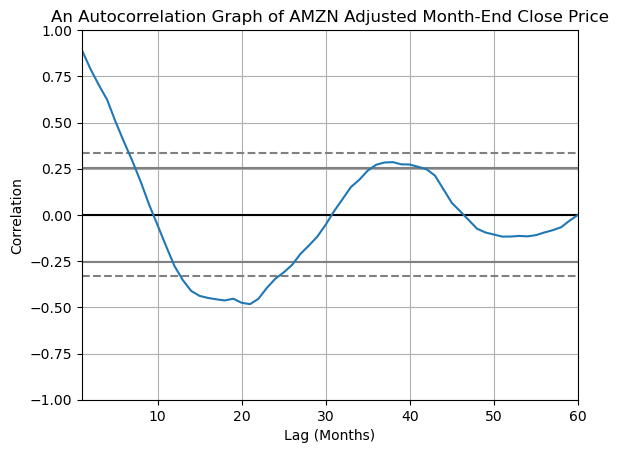

In [17]:
AMZN_cor_plot = pd.plotting.autocorrelation_plot(amzn_month_end)
AMZN_cor_plot.set_title("An Autocorrelation Graph of AMZN Adjusted Month-End Close Price")
AMZN_cor_plot.set_ylabel("Correlation")
AMZN_cor_plot.set_xlabel("Lag (Months)")
plt.show()

**FB_Auto_Correlation**

Similarly to AMZN, this graph shows positive autocorrelation that becomes statisically insignificant around 5 months lag (shown by the dashed lines). This suggests that while there is positive autocorrelation in the short term, it becomes much less predictable over a longer period of time.  

The autocorrelation fluctuates around zero, occasionally dipping into negative territory between lags 11 and 20. This doesn't necessarily indicate an inverse relationship but rather a lack of consistent correlation, making predictions based on past returns unreliable in this period.

Overall this indicates that it is difficult to predicit the pattern due to the cyclical variation of the autocorrelation.

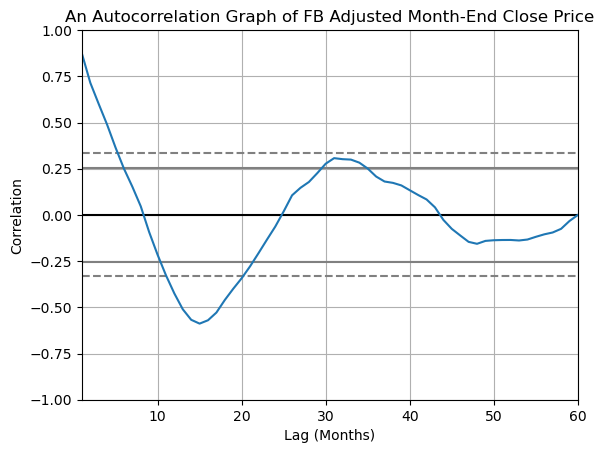

In [18]:
FB_cor_plot = pd.plotting.autocorrelation_plot(fb_month_end)
FB_cor_plot.set_title("An Autocorrelation Graph of FB Adjusted Month-End Close Price")
FB_cor_plot.set_ylabel("Correlation")
FB_cor_plot.set_xlabel("Lag (Months)")
plt.show()

**IBM_Auto_Correlation**

This graph shows positive autocorrelation that becomes statisically insignificant around 8 months lag (shown by the dashed lines). This suggests that while there is positive autocorrelation in the short term, it becomes much less predictable over a longer period of time.  

This doesn't have as much variation as AMZN or FB but is still not a great indicator of how the stock will preform 60 months from now. 

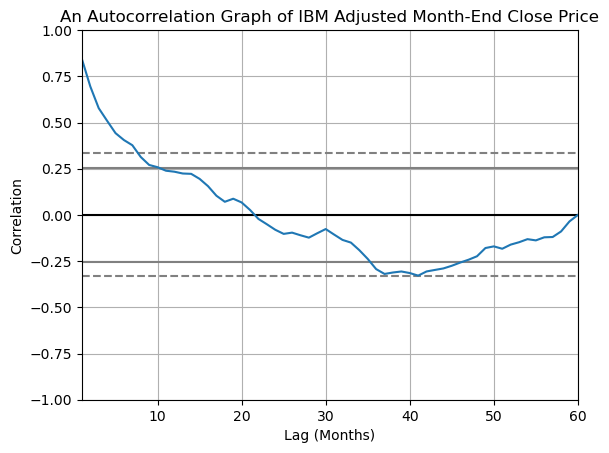

In [19]:
IBM_cor_plot = pd.plotting.autocorrelation_plot(ibm_month_end)
IBM_cor_plot.set_title("An Autocorrelation Graph of IBM Adjusted Month-End Close Price")
IBM_cor_plot.set_ylabel("Correlation")
IBM_cor_plot.set_xlabel("Lag (Months)")
plt.show()

**MMM_Auto_Correlation**

This graph shows positive autocorrelation that becomes statisically insignificant around 9 months lag (shown by the dashed lines). This suggests that while there is positive autocorrelation in the short term, it becomes much less predictable over a longer period of time.  

Smiilarly to IBM this doesn't have as much variation as AMZN or FB but is still not a great indicator of how the stock will preform 60 months from now. 

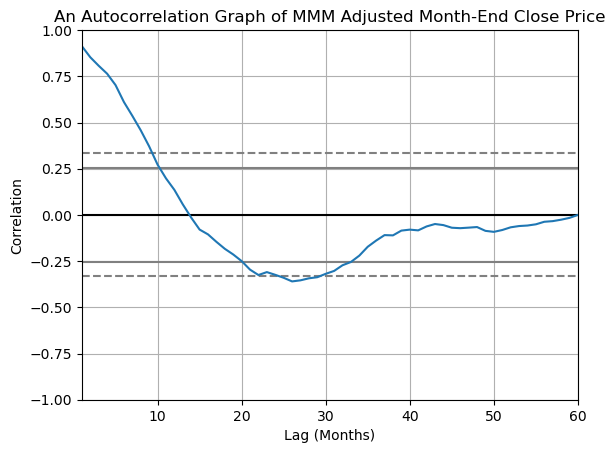

In [20]:
MMM_cor_plot = pd.plotting.autocorrelation_plot(mmm_month_end)
MMM_cor_plot.set_title("An Autocorrelation Graph of MMM Adjusted Month-End Close Price")
MMM_cor_plot.set_ylabel("Correlation")
MMM_cor_plot.set_xlabel("Lag (Months)")
plt.show()

**ALL STOCK Auto Correlation**

All stocks together show positive autocorrelation that becomes statisically insignificant around 10 months lag (shown by the dashed lines). This suggests that while there is positive autocorrelation in the short term, it becomes much less predictable over a longer period of time.  

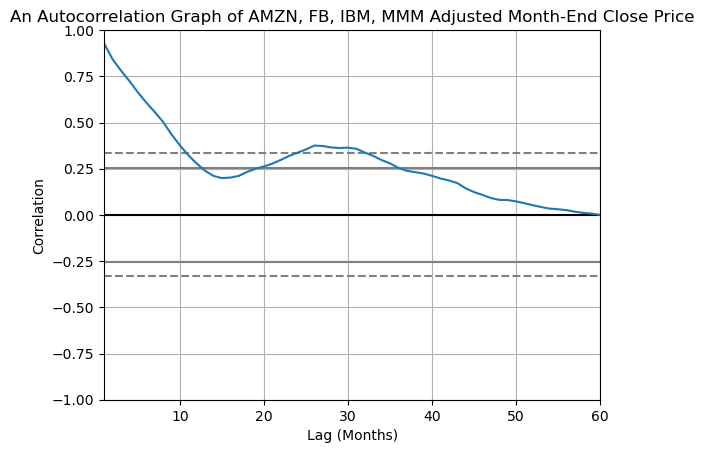

In [21]:
All_Stocks_cor_plot = pd.plotting.autocorrelation_plot(all_stocks_month_end)
All_Stocks_cor_plot.set_title("An Autocorrelation Graph of AMZN, FB, IBM, MMM Adjusted Month-End Close Price")
All_Stocks_cor_plot.set_ylabel("Correlation")
All_Stocks_cor_plot.set_xlabel("Lag (Months)")
plt.show()

**QUESTION 5 SHIFT TRICK AND MONTHLY RETURNS**

The next 4 graphs show the Monthly Return calculated using the shift trick and the growth forumula, (present - past / past)

They suggest that there is no strong autocorrelation at any specific lag as the coefficients all fall within the the confidence bounds. This reinforces that randomness is often observed in stock prices patterns. 




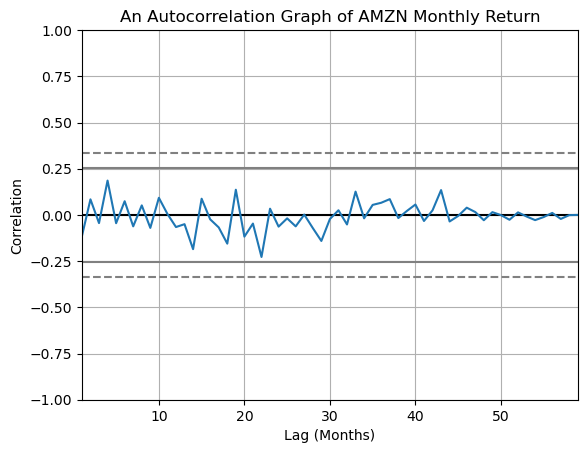

In [22]:
#AMZN Monthly Return Shift and AutoCorrelation

# With shift(), we can shift the `TimeSeries` (not the time range)
amzn_df = pd.DataFrame({"amzn_beforeShift":amzn_month_end, "amzn_afterShift" : amzn_month_end.shift(1), 
"amzn_monthly_return" :  (amzn_month_end - amzn_month_end.shift(1)) / amzn_month_end.shift(1)})

amzn_df = amzn_df.dropna()

amzn_monthly_return_cor_plot = pd.plotting.autocorrelation_plot(amzn_df["amzn_monthly_return"])
amzn_monthly_return_cor_plot.set_title("An Autocorrelation Graph of AMZN Monthly Return")
amzn_monthly_return_cor_plot.set_ylabel("Correlation")
amzn_monthly_return_cor_plot.set_xlabel("Lag (Months)")
plt.show()


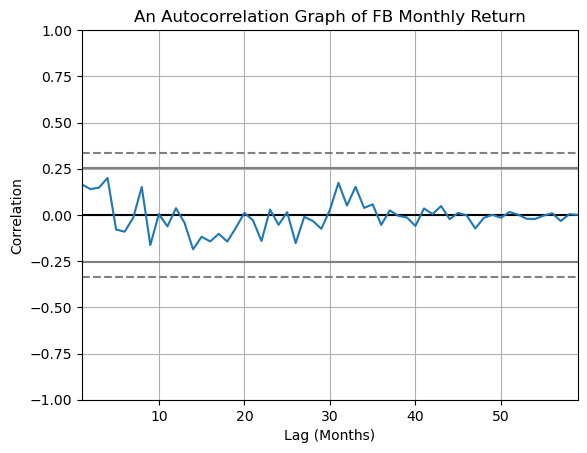

In [23]:
#FB Monthly Return Shift and AutoCorrelation

# With shift(), we can shift the `TimeSeries` (not the time range)
fb_df = pd.DataFrame({"fb_beforeShift":fb_month_end, "fb_afterShift" : fb_month_end.shift(1), 
"fb_monthly_return" :  (fb_month_end - fb_month_end.shift(1)) / fb_month_end.shift(1)})

fb_df = fb_df.dropna()

fb_monthly_return_cor_plot = pd.plotting.autocorrelation_plot(fb_df["fb_monthly_return"])
fb_monthly_return_cor_plot.set_title("An Autocorrelation Graph of FB Monthly Return")
fb_monthly_return_cor_plot.set_ylabel("Correlation")
fb_monthly_return_cor_plot.set_xlabel("Lag (Months)")
plt.show()

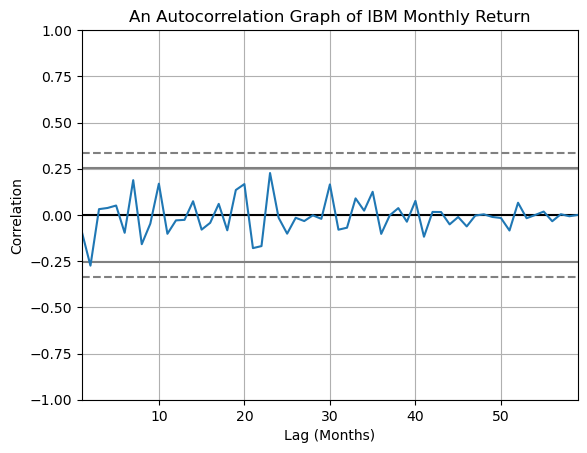

In [24]:
#IBM Monthly Return Shift and AutoCorrelation

# With shift(), we can shift the `TimeSeries` (not the time range)
ibm_df = pd.DataFrame({"ibm_beforeShift":ibm_month_end, "ibm_afterShift" : ibm_month_end.shift(1), 
"ibm_monthly_return" :  (ibm_month_end - ibm_month_end.shift(1)) / ibm_month_end.shift(1)})

ibm_df = ibm_df.dropna()

ibm_monthly_return_cor_plot = pd.plotting.autocorrelation_plot(ibm_df["ibm_monthly_return"])
ibm_monthly_return_cor_plot.set_title("An Autocorrelation Graph of IBM Monthly Return")
ibm_monthly_return_cor_plot.set_ylabel("Correlation")
ibm_monthly_return_cor_plot.set_xlabel("Lag (Months)")
plt.show()

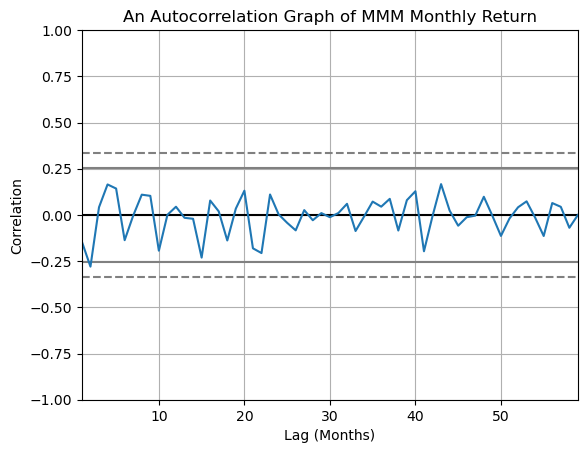

In [25]:
#MMM Monthly Return Shift and AutoCorrelation

# With shift(), we can shift the `TimeSeries` (not the time range)
mmm_df = pd.DataFrame({"mmm_beforeShift":mmm_month_end, "mmm_afterShift" : mmm_month_end.shift(1), 
"mmm_monthly_return" :  (mmm_month_end - mmm_month_end.shift(1)) / mmm_month_end.shift(1)})

mmm_df = mmm_df.dropna()

mmm_monthly_return_cor_plot = pd.plotting.autocorrelation_plot(mmm_df["mmm_monthly_return"])
mmm_monthly_return_cor_plot.set_title("An Autocorrelation Graph of MMM Monthly Return")
mmm_monthly_return_cor_plot.set_ylabel("Correlation")
mmm_monthly_return_cor_plot.set_xlabel("Lag (Months)")
plt.show()

In [26]:
amzn_returns = amzn_df['amzn_monthly_return']
fb_returns = fb_df['fb_monthly_return']
ibm_returns = ibm_df['ibm_monthly_return']
mmm_returns = mmm_df['mmm_monthly_return']


all_stocks_returns_df = pd.DataFrame({
    'AMZN': amzn_returns,
    'FB': fb_returns,
    'IBM': ibm_returns,
    'MMM': mmm_returns
})

all_stocks_returns_df

,AMZN,FB,IBM,MMM
Date,,,,
2019-05-31,-0.078613,-0.082368,-0.083921,-0.149824
2019-06-28,0.066792,0.087508,0.085912,0.085070
2019-07-31,-0.014179,0.006373,0.074982,0.007961
2019-08-30,-0.048474,-0.044071,-0.074967,-0.065935
2019-09-30,-0.022733,-0.040879,0.072972,0.016572
2019-10-31,0.023475,0.076202,-0.080388,0.003589
2019-11-29,0.013587,0.052126,0.017259,0.037880
2019-12-31,0.026122,0.017903,-0.003050,0.039171
2020-01-31,0.087064,-0.016273,0.072292,-0.100669


**Question 6**

The scatter plot matrix suggests that there might be a low to moderate relationship between the monthly returns of these stocks, but none of the relationships appears to be very strong. FB and AMZN have a low postive linear relationship, the same could be said about MMM and IBM or FB and MM but none are strong or good indicators of how the stocks would preform together. While the returns sometimes move in the same direction there is not enough of a relationship to imply a reliable predictive relationship Ie. If Facebook were to increase it does not mean that AMZN would also increase. 

This could be an example of where the movements of these companies are not tightly tied to each other. This could be a good example of a portfolio that would minimze risk due to the independant nature of the stocks preformance. 

In [27]:
#Importing scatter matrix
from pandas.plotting import scatter_matrix


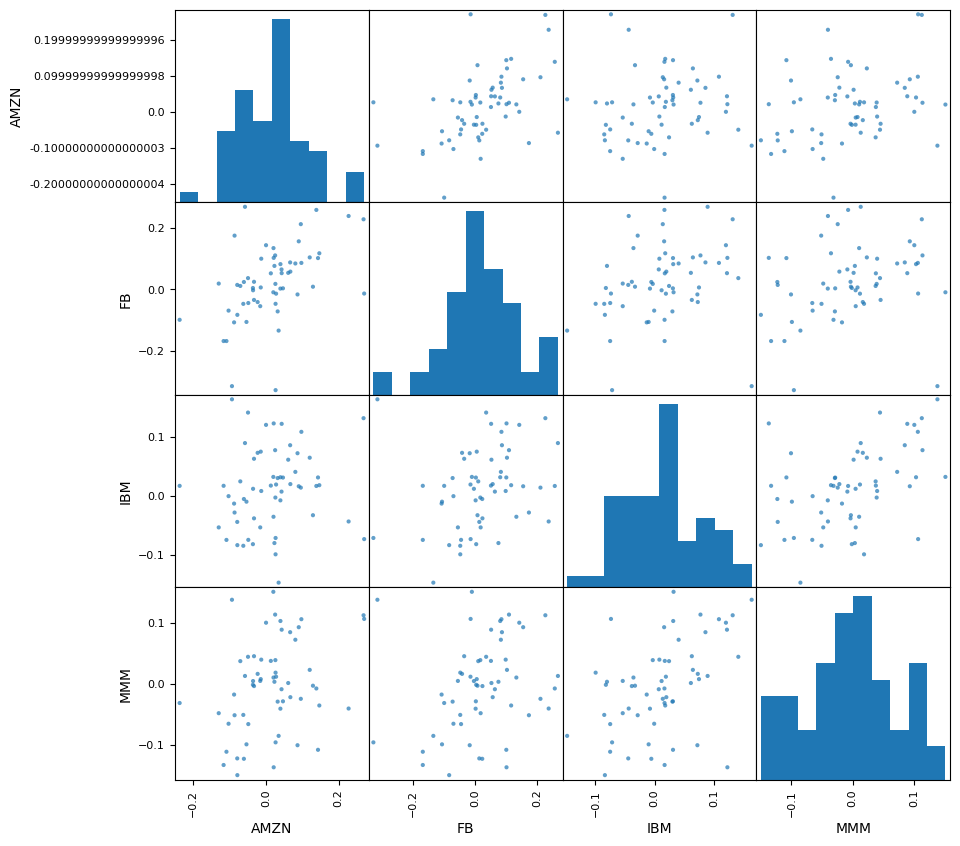

In [28]:
All_stocks_scatter_plot = scatter_matrix(all_stocks_returns_df, alpha=0.70, figsize=(10, 10))